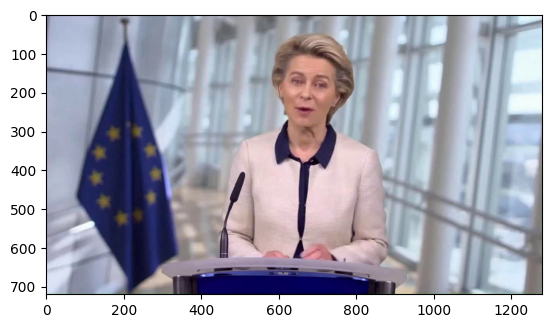

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace 'video_path' with the path to your video file
video_path = './results/results_2.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame from the video
ret, frame = cap.read()

# Check if the frame was read successfully
if not ret:
    print("Error: Could not read frame.")
    cap.release()
    exit()

# Convert the BGR frame to RGB for Matplotlib display
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the first frame using Matplotlib
plt.imshow(frame_rgb)
#plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Release the video capture object
cap.release()


In [12]:
#cv2.imwrite("Byrnes_lowres.png", frame)

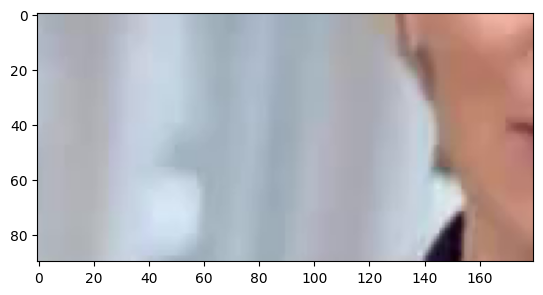

In [13]:
roi = [200,290, 470,650]
plt.imshow(frame_rgb[roi[0]:roi[1], roi[2]:roi[3], ...])

In [8]:
# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the ROI coordinates [y1:y2, x1:x2, :]
#roi = [270,390, 550,800]

# Create a VideoWriter object to save the modified video
output_path = './output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can use other codecs as well
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Apply Gaussian smoothing to the ROI
    roi_frame = frame[roi[0]:roi[1], roi[2]:roi[3], :]
    smoothed_roi_frame = cv2.GaussianBlur(roi_frame, (5, 5), 7)

    # Replace the ROI in the original frame with the smoothed ROI
    frame[roi[0]:roi[1], roi[2]:roi[3], :] = smoothed_roi_frame

    # Write the modified frame to the output video
    out.write(frame)

# Release the video capture and output objects
cap.release()
out.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

# Save frames of Video in a Folder

In [10]:
import os
from tqdm import tqdm

inputVideoPath = 'outputs-hd/finalresult_1.mp4'
unProcessedFramesFolderPath = 'frames_b1/'

if not os.path.exists(unProcessedFramesFolderPath):
  os.makedirs(unProcessedFramesFolderPath)

vidcap = cv2.VideoCapture(inputVideoPath)
numberOfFrames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = vidcap.get(cv2.CAP_PROP_FPS)
print("FPS: ", fps, "Frames: ", numberOfFrames)

for frameNumber in tqdm(range(numberOfFrames)):
    _,image = vidcap.read()
    cv2.imwrite(os.path.join(unProcessedFramesFolderPath, str(frameNumber).zfill(4)+'.png'), image)

print("saved!")

0it [00:00, ?it/s]

FPS:  0.0 Frames:  0
saved!
